In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Read and show data

In [2]:
data = pd.read_csv('customer.csv')

In [3]:
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,NaN,7,72000
7,11.0,7.0,8,80000


Check for missing values

In [4]:
for column in data.columns:
    number_of_missing_values = data[column].isna().sum()
    print(f'In {column} column exists {number_of_missing_values} miss values')

In experience column exists 2 miss values
In test_score column exists 1 miss values
In interview_score column exists 0 miss values
In salary column exists 0 miss values


In [5]:
data.describe()

,experience,test_score,interview_score,salary
count,6.000000,7.000000,8.000000,8.00000
mean,6.333333,7.857143,7.875000,63000.00000
std,3.669696,1.345185,1.642081,11501.55269
min,2.000000,6.000000,6.000000,45000.00000
25%,3.500000,7.000000,6.750000,57500.00000
50%,6.000000,8.000000,7.500000,63500.00000
75%,9.250000,8.500000,9.250000,70500.00000
max,11.000000,10.000000,10.000000,80000.00000


Replace the missing values

In [6]:
data['experience'].fillna(value = data['experience'].median(), inplace = True)
data['test_score'].fillna(value = data['test_score'].median(), inplace = True)

In [7]:
data

,experience,test_score,interview_score,salary
0,6.0,8.0,9,50000
1,6.0,8.0,6,45000
2,5.0,6.0,7,60000
3,2.0,10.0,10,65000
4,7.0,9.0,6,70000
5,3.0,7.0,10,62000
6,10.0,8.0,7,72000
7,11.0,7.0,8,80000


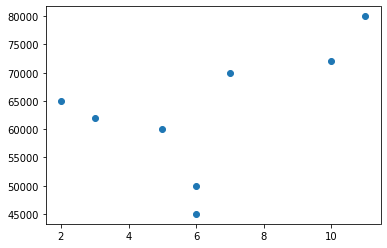

In [8]:
plt.scatter(x = data['experience'], y = data['salary'])

# Scale the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()

In [15]:
experience = data['experience'].to_numpy().reshape(-1,1)
salary = data['salary'].to_numpy().reshape(-1,1)

In [16]:
experience = scaler.fit_transform(experience)
salary = scaler.fit_transform(salary)

In [17]:
data.drop(labels = ['experience','salary'], axis = 1, inplace = True)

In [18]:
data['experience'] = experience
data['salary'] = salary

In [19]:
data

,test_score,interview_score,experience,salary
0,8.0,9,-0.086066,-1.208322
1,8.0,6,-0.086066,-1.673062
2,6.0,7,-0.430331,-0.278844
3,10.0,10,-1.463127,0.185896
4,9.0,6,0.258199,0.650635
5,7.0,10,-1.118862,-0.092948
6,8.0,7,1.290994,0.836531
7,7.0,8,1.635260,1.580114


Our goal is to cluster them by experience and salary

To find the better number of clusters, we will use the elbow method

We wil keep all sum of squared distance between samples and their closest center and we will plot that to find out the number of clusters that we will use

In [21]:
from sklearn.cluster import KMeans

In [22]:
SSE = []
for n in range(1,8):
    model = KMeans(n_clusters = n)
    model.fit_predict(data[['experience','salary']])
    SSE.append(model.inertia_)

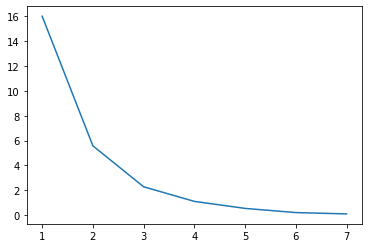

In [24]:
plt.plot(list(range(1,8)),SSE)

According to this plot, we will chose n_clusters to be 3

In [25]:
model = KMeans(n_clusters = 3)

In [26]:
y = model.fit_predict(data[['experience','salary']])

In [28]:
data['cluster'] = y

In [29]:
data

,test_score,interview_score,experience,salary,cluster
0,8.0,9,-0.086066,-1.208322,1
1,8.0,6,-0.086066,-1.673062,1
2,6.0,7,-0.430331,-0.278844,2
3,10.0,10,-1.463127,0.185896,2
4,9.0,6,0.258199,0.650635,0
5,7.0,10,-1.118862,-0.092948,2
6,8.0,7,1.290994,0.836531,0
7,7.0,8,1.635260,1.580114,0


To vizualize our clusters, we will use seaborn package

In [30]:
import seaborn

<AxesSubplot:xlabel='experience', ylabel='salary'>

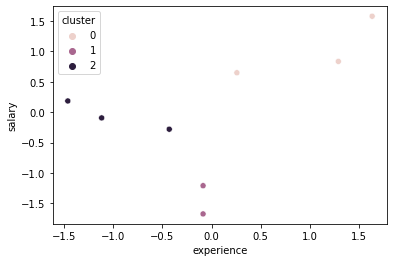

In [31]:
seaborn.scatterplot(data = data, x = 'experience', y = 'salary', hue = 'cluster')

Plot the clusters and also the centroids

In [33]:
clusters_centers = model.cluster_centers_
clusters_centers

array([[ 1.06148432,  1.02242671],
       [-0.0860663 , -1.44069218],
       [-1.00410679, -0.06196525]])

In [35]:
x = clusters_centers[:,0]
x

array([ 1.06148432, -0.0860663 , -1.00410679])

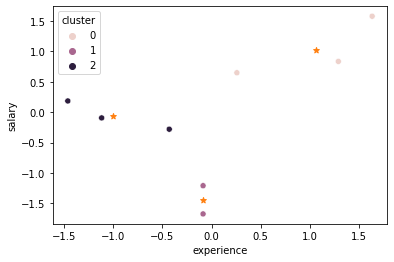

In [37]:
seaborn.scatterplot(data = data, x = 'experience', y = 'salary', hue = 'cluster')
plt.scatter(x = clusters_centers[:,0],y = clusters_centers[:,1], marker='*')
plt.show()